In [1]:
#importing heat_threshold function we will apply to our dataset. Will help us differentiate a heat vs. non-heat day

def heat_threshold(daily_high, high_thresh, daily_low=None, low_thresh=None):
    """
    Returns a heat day boolean based upon daily high and low heat index and manually set thresholds

    Arguments:\n
        daily_high: Numeric or dataframe column with daily high heat index\n
        daily_low: Optional, numeric or dataframe column with daily low heat index\n
        high_thresh: Numeric threshold to check for the daily high heat index\n
        low_thresh: Optional, numeric integer to check daily low threshold against
    """
    if daily_low is not None:
        if daily_high > high_thresh and daily_low > low_thresh:
            return True
        else:
            return False
    else:
        if daily_high > high_thresh:
            return True
        else:
            return False

In [2]:
import pandas as pd

date=pd.read_csv('data/Info_requests/311_agg_bydate.csv')
NC=pd.read_csv('data/Info_requests/311_agg_byNC.csv')
temp=pd.read_csv('data/Info_requests/DTLA_temp.csv')


In [3]:
# 1 merge "311_agg_bydate" file with the "DTLA_temp"
citywide = date.merge(temp, how='inner', left_on='Creation Date', right_on='date_time')
citywide.head(5)

Unnamed: 0_x Creation Date  Total Rows  Unnamed: 0_y   date_time  stid  \
0             0    2018-01-01           5          1826  2018-01-01  KCQT   
1             1    2018-01-02          25          1827  2018-01-02  KCQT   
2             2    2018-01-03          28          1828  2018-01-03  KCQT   
3             3    2018-01-04          13          1829  2018-01-04  KCQT   
4             4    2018-01-05          18          1830  2018-01-05  KCQT   

   relative_humidity_high  air_temp_high  heat_index_high  \
0                   96.07          69.98         68.25156   
1                   93.03          75.92         74.15388   
2                   86.70          73.94         71.99703   
3                   90.04          73.94         72.41063   
4                   80.51          71.96         71.45416   

   relative_humidity_low  air_temp_low  heat_index_low        lon       lat  
0                  33.48         46.94        45.54755 -118.29122  34.02355  
1                  20.04         53.06        52.18179 -118.29122  34.02355  
2                  20.20         53.96        51.82477 -118.29122  34.02355  
3                  29.29         53.96        52.17210 -118.29122  34.02355  
4                  35.83         53.96        52.67829 -118.29122  34.02355

In [4]:
# apply the "heat_threshold" function to each row with high thres as 90 and low thres as 70 
#can change the parameters if necessary
citywide['heat_check'] = citywide.apply(lambda x: heat_threshold(x.heat_index_high,90.0, x.heat_index_low,70.0), axis=1)

In [5]:
citywide.head()

Unnamed: 0_x Creation Date  Total Rows  Unnamed: 0_y   date_time  stid  \
0             0    2018-01-01           5          1826  2018-01-01  KCQT   
1             1    2018-01-02          25          1827  2018-01-02  KCQT   
2             2    2018-01-03          28          1828  2018-01-03  KCQT   
3             3    2018-01-04          13          1829  2018-01-04  KCQT   
4             4    2018-01-05          18          1830  2018-01-05  KCQT   

   relative_humidity_high  air_temp_high  heat_index_high  \
0                   96.07          69.98         68.25156   
1                   93.03          75.92         74.15388   
2                   86.70          73.94         71.99703   
3                   90.04          73.94         72.41063   
4                   80.51          71.96         71.45416   

   relative_humidity_low  air_temp_low  heat_index_low        lon       lat  \
0                  33.48         46.94        45.54755 -118.29122  34.02355   
1                  20.04         53.06        52.18179 -118.29122  34.02355   
2                  20.20         53.96        51.82477 -118.29122  34.02355   
3                  29.29         53.96        52.17210 -118.29122  34.02355   
4                  35.83         53.96        52.67829 -118.29122  34.02355   

   heat_check  
0       False  
1       False  
2       False  
3       False  
4       False

In [6]:
#creating dataframe for days that are considered extreme heat, at the citywide level
heat_day= citywide[citywide['heat_check'] == True]
heat_day = heat_day[['Creation Date','Total Rows','heat_index_high', 'heat_index_low']]
heat_day

Creation Date  Total Rows  heat_index_high  heat_index_low
183     2018-07-07          14       104.155024       79.123990
184     2018-07-08           7        96.229430       79.899330
185     2018-07-09          26        94.127112       75.684020
186     2018-07-10          32        90.343485       74.490850
187     2018-07-11          38        90.658630       72.692140
199     2018-07-23          37        95.379192       70.365150
200     2018-07-24          34        97.127396       72.303920
201     2018-07-25          30        93.693014       72.963330
205     2018-07-29           5        94.838664       70.507560
209     2018-08-02          29        91.612957       72.303920
210     2018-08-03          25        93.815658       70.629290
214     2018-08-07          51        97.103421       71.945600
215     2018-08-08          40        94.770893       73.742900
216     2018-08-09          46        94.837693       71.945600
217     2018-08-10          35        92.856497       74.736190
218     2018-08-11           5        92.176733       73.368780
224     2018-08-17          29        90.132429       74.004220
560     2019-07-24          46        94.770893       71.420610
597     2019-08-30          33        92.607270       71.420610
600     2019-09-02           9        96.229430       71.674880
601     2019-09-03          43        93.188702       74.622920
602     2019-09-04          34        94.770893       72.436930
603     2019-09-05          44        92.413539       74.159500
604     2019-09-06          54        91.465970       72.933560
612     2019-09-14           5        96.078847       70.116520
941     2020-08-14          39        92.066148       71.180910
942     2020-08-15          22       100.028640       73.496620
943     2020-08-16          16        93.769621       75.333400
944     2020-08-17         175        90.437738       73.607070
945     2020-08-18          84        98.361254       72.303920
946     2020-08-19          71        97.127396       76.348310
947     2020-08-20          57        94.157505       73.742900
948     2020-08-21          74        95.479060       73.742900
949     2020-08-22          17        95.379192       73.859930
950     2020-08-23          13        93.115000       75.793060
964     2020-09-06          13       109.889039       77.117070
965     2020-09-07          12        93.918374       77.641590
1302    2021-08-12          31        90.485910       70.008420
1680    2022-09-01          21        96.471465       73.948000
1681    2022-09-02          22        96.708878       72.963330
1682    2022-09-03          11       100.008284       75.453250
1683    2022-09-04          17       103.449234       81.078688
1684    2022-09-05          15       101.618061       77.061300
1685    2022-09-06          36        97.870573       75.021480
1686    2022-09-07          22       101.440336       72.963330
1687    2022-09-08          21        97.214712       73.607070
1688    2022-09-09          19        98.761639       90.504650
1690    2022-09-11           5        90.132429       75.928420

In [7]:
# dataframe of days that are not considered extreme heat days based on threshold, citywide level 
non_heat = citywide[citywide['heat_check'] == False]
non_heat = non_heat[['Creation Date','Total Rows','heat_index_high', 'heat_index_low']]
non_heat


Creation Date  Total Rows  heat_index_high  heat_index_low
0       2018-01-01           5         68.25156        45.54755
1       2018-01-02          25         74.15388        52.18179
2       2018-01-03          28         71.99703        51.82477
3       2018-01-04          13         72.41063        52.17210
4       2018-01-05          18         71.45416        52.67829
...            ...         ...              ...             ...
1793    2022-12-27          20         69.38316        53.72670
1794    2022-12-28          20         63.19336        51.24618
1795    2022-12-29          19         62.25117        56.20597
1796    2022-12-30          18         59.70921        56.20597
1797    2022-12-31           3         60.13926        56.82590

[1750 rows x 4 columns]

/tmp/ipykernel_262/2118605670.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(labels)


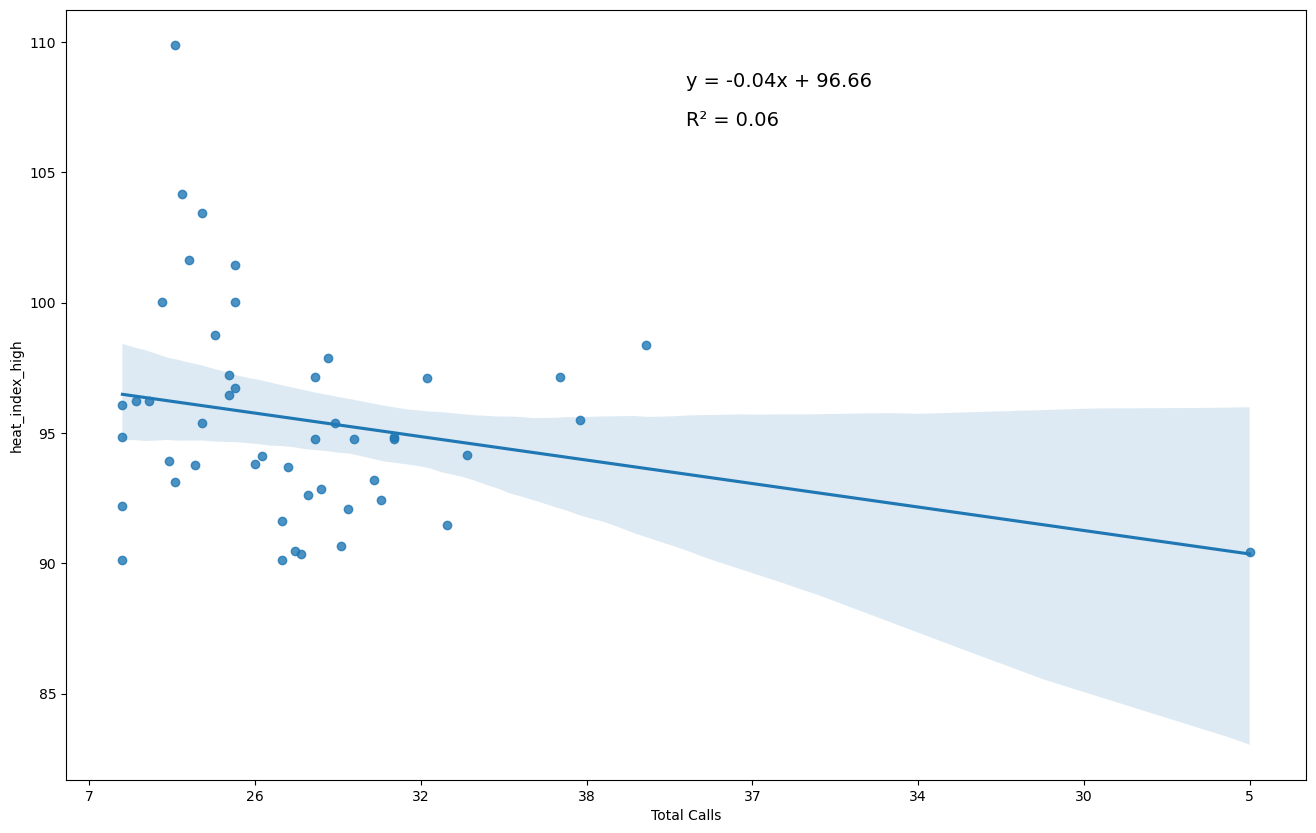

In [14]:
# plot scatter with regression line for data with extreme heat
#Here Call volumes is X, Heat is Y
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


# Initialize layout

plt.figure(figsize=(16,10))
fig = sns.regplot(data = heat_day, x = 'Total Rows', y = 'heat_index_high')

labels = list(heat_day['Total Rows'].values)


# Fit a linear regression model
X = heat_day['Total Rows'].values.reshape(-1,1)
y = heat_day['heat_index_high'].values.reshape(-1,1)
reg = LinearRegression().fit(X, y)

# Add regression equation and R^2 value to plot
equation = 'y = {:.2f}x + {:.2f}'.format(reg.coef_[0][0], reg.intercept_[0])
r_squared = 'R² = {:.2f}'.format(reg.score(X, y))
plt.text(0.5, 0.9, equation, fontsize=14, transform=plt.gca().transAxes)
plt.text(0.5, 0.85, r_squared, fontsize=14, transform=plt.gca().transAxes)

# Set x-tick labels
fig.set_xticklabels(labels)

# Change x-axis title
plt.xlabel('Total Calls')

plt.show()

/tmp/ipykernel_262/1524913290.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(labels)


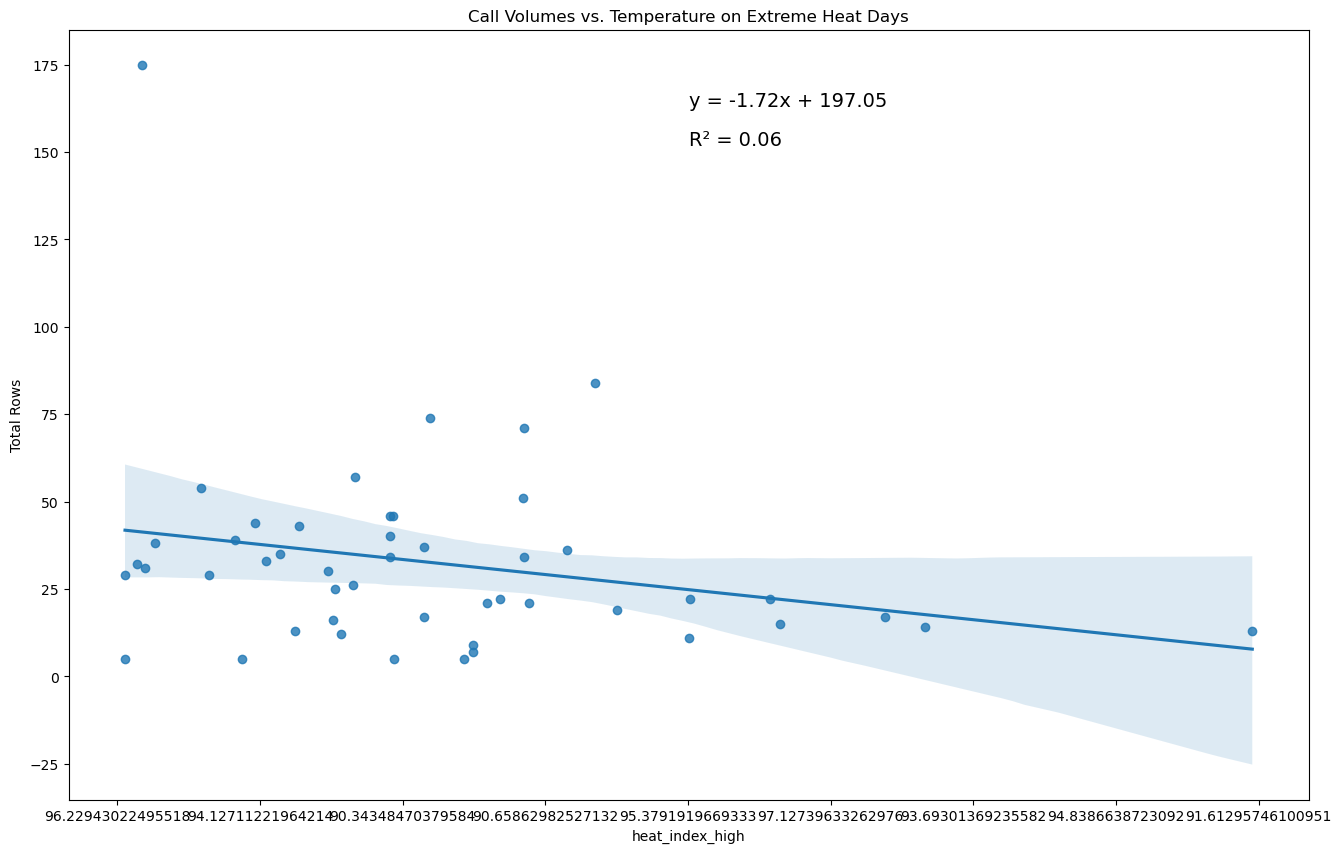

In [33]:
# plot scatter with regression line for data with extreme heat
# Here X= Temp, Y= Call volumes
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


# Initialize layout

plt.figure(figsize=(16,10))
fig = sns.regplot(data = heat_day, x = 'heat_index_high', y = 'Total Rows')

labels = list(heat_day['heat_index_high'].values)


# Fit a linear regression model
X = heat_day['heat_index_high'].values.reshape(-1,1)
y = heat_day['Total Rows'].values.reshape(-1,1)
reg = LinearRegression().fit(X, y)

# Add regression equation and R^2 value to plot
equation = 'y = {:.2f}x + {:.2f}'.format(reg.coef_[0][0], reg.intercept_[0])
r_squared = 'R² = {:.2f}'.format(reg.score(X, y))
plt.text(0.5, 0.9, equation, fontsize=14, transform=plt.gca().transAxes)
plt.text(0.5, 0.85, r_squared, fontsize=14, transform=plt.gca().transAxes)

# Set x-tick labels
fig.set_xticklabels(labels)

# Change x-axis title
plt.xlabel('heat_index_high')

# Set title
plt.title('Call Volumes vs. Temperature on Extreme Heat Days')

# Save the figure as a PNG image
plt.savefig('Calls_vs_ExtremeHeat.png')

plt.show()


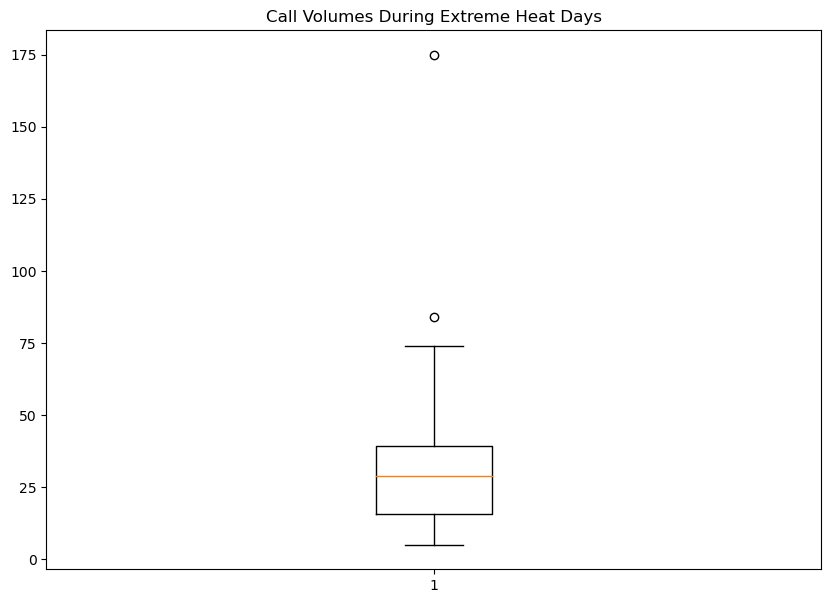

In [27]:
# plot box plot of call volumes during extreme heat days

import matplotlib.pyplot as plt
 
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(heat_day['Total Rows'])

plt.title('Call Volumes During Extreme Heat Days')

# Save the figure as a PNG image
fig.savefig('heatday_calls_boxplot.png', dpi=300, bbox_inches='tight')
 
# show plot
plt.show()

In [30]:
# Display summary statistics of the call volumes during extreme heat days
print(heat_day['Total Rows'].describe())

count     48.000000
mean      32.583333
std       27.878027
min        5.000000
25%       15.750000
50%       29.000000
75%       39.250000
max      175.000000
Name: Total Rows, dtype: float64


/tmp/ipykernel_262/221479466.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(labels)


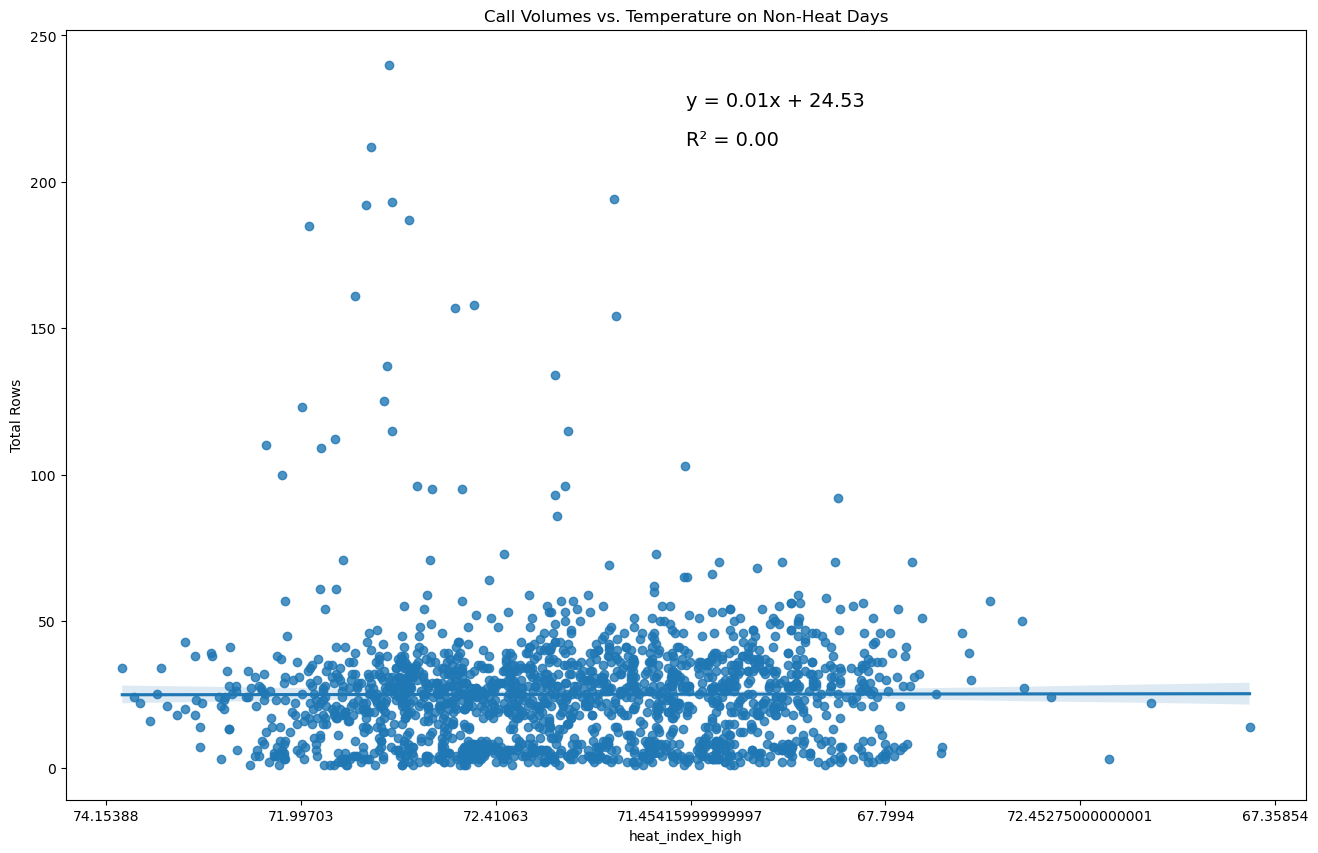

In [34]:
# plot scatter with regression line for data with extreme heat
# Here X= Temp, Y= Call volumes
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


# Initialize layout

plt.figure(figsize=(16,10))
fig = sns.regplot(data = non_heat, x = 'heat_index_high', y = 'Total Rows')

labels = list(non_heat['heat_index_high'].values)


# Fit a linear regression model
X = non_heat['heat_index_high'].values.reshape(-1,1)
y = non_heat['Total Rows'].values.reshape(-1,1)
reg = LinearRegression().fit(X, y)

# Add regression equation and R^2 value to plot
equation = 'y = {:.2f}x + {:.2f}'.format(reg.coef_[0][0], reg.intercept_[0])
r_squared = 'R² = {:.2f}'.format(reg.score(X, y))
plt.text(0.5, 0.9, equation, fontsize=14, transform=plt.gca().transAxes)
plt.text(0.5, 0.85, r_squared, fontsize=14, transform=plt.gca().transAxes)

# Set x-tick labels
fig.set_xticklabels(labels)

# Change x-axis title
plt.xlabel('heat_index_high')

# Set title
plt.title('Call Volumes vs. Temperature on Non-Heat Days')

# Save the figure as a PNG image
plt.savefig('Calls_vs_NonHeat.png')

plt.show()


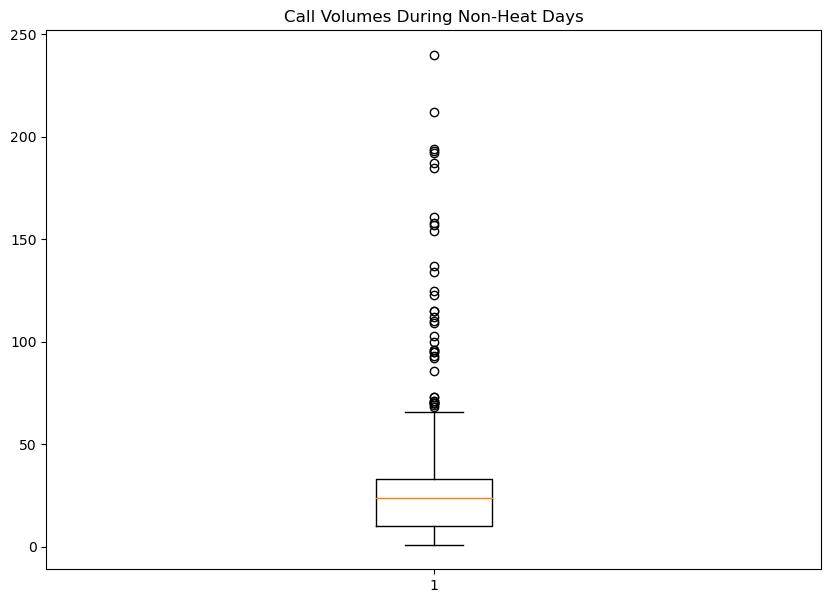

In [28]:
# plot box plot of call volumes during non-heat days

import matplotlib.pyplot as plt
 
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(non_heat['Total Rows'])

plt.title('Call Volumes During Non-Heat Days')

# Save the figure as a PNG image
fig.savefig('nonheatday_boxplot.png', dpi=300, bbox_inches='tight')
 
# show plot
plt.show()

In [29]:
# Display summary statistics of the call volumes during non_heat days
print(non_heat['Total Rows'].describe())

count    1750.000000
mean       24.982857
std        21.030016
min         1.000000
25%        10.000000
50%        24.000000
75%        33.000000
max       240.000000
Name: Total Rows, dtype: float64
